## 7.1 데이터 합치기

### 7.1.1 데이터베이스 스타일로 DataFrame 합치기

In [173]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 'data1' : range(7)})
df2 = pd.DataFrame({'key': ['a','b','d'], 'data2': range(3)})

In [3]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
pd.merge(df1, df2) # 겹치는 컬럼을 자동으로 찾음

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [8]:
df3 = pd.DataFrame({'lkey': ['b','b','a','c','a','a','b'], 'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a','b','d'], 'data2': range(3)})

In [9]:
# pd.merge : 내부적으로 inner join
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [10]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [11]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','b'], 'data1': range(6)})
df2 = pd.DataFrame({'key': ['a','b','a','b','d'], 'data2': range(5)})

In [12]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [13]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [15]:
pd.merge(df1, df2, on='key', how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


여러 개의 키를 병합

In [16]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 'key2': ['one', 'two', 'one'], 'lval': [1,2,3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'], 'key2': ['one', 'one', 'one', 'two'], 'rval': [4,5,6,7]})

In [17]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [19]:
# 겹치는 컬럼 처리
pd.merge(left, right, on=['key1'], suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


참고 : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

### 7.1.2 색인 머지하기

In [24]:
left1 = pd.DataFrame({'key': ['a','b','a','a','b','c'], 'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5,7]}, index=['a','b'])

In [25]:
right1

,group_val
a,3.5
b,7.0


In [26]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [27]:
# 합집합
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


계층적 색인

In [28]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'key2': [2000, 2001, 2002, 2001, 2002], 'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6,2)), index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio','Ohio'],[2001,2000,2000,2000,2001,2002]], columns=['event1', 'event2'])

In [29]:
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [30]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [31]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [32]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


공통 색인이 없을 경우 outer

In [33]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a','c','e'], columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7.,8.,], [9., 10.], [11., 12.], [13,14]], index=['b', 'c', 'd','e'], columns=['Missouri', 'Alabama'])

In [34]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [35]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [36]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


pd.DataFrame.join : 컬럼이 겹치지 않으며 완전히 같거나 유사한 색인 구조를 가진 dataframe을 합칠때 좋음

In [37]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [38]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]], index=['a','c','e','f'], columns=['New York', 'Oregon'])
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [39]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### 7.1.3 축 따라 이어붙이기

In [40]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
np.concatenate([arr, arr], axis=1) # column 방향

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [44]:
s1 = pd.Series([0,1], index=['a','b'])
s2 = pd.Series([2,3,4], index=['c','d','e'])
s3 = pd.Series([5,6], index=['f','g'])

In [45]:
pd.concat([s1,s2,s3]) # 기본방향 : axis=0(row 방향)

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [46]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [47]:
s4 = pd.concat([s1*5, s3])

In [48]:
pd.concat([s1,s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [49]:
pd.concat([s1,s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [51]:
# join_axes : 머지하려는 축을 직접 지정
pd.concat([s1,s4], axis=1, join_axes=[['a','c','b','e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [52]:
# 이어붙이되 개별 Series 구별
result = pd.concat([s1,s2,s3], keys=['one','two', 'three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [54]:
pd.concat([s1,s2,s3], axis=1, keys=['one', 'two', 'three']) # column방향 붙이기

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [55]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), index=['a','b','c'], columns=['one', 'two'])
df2 = pd.DataFrame(5+np.arange(4).reshape(2,2), index=['a','c'], columns=['three', 'four'])

In [56]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [57]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [62]:
# ignore_index : concat시 row 색인 제거
df1 = pd.DataFrame(np.random.randn(3,4), columns=['a','b','c','d'], index=['a','b','c'])
df2 = pd.DataFrame(np.random.randn(2,3), columns=['b','d','a'], index=['a','b'])
pd.concat([df1, df2])

,a,b,c,d
a,1.791619,0.028366,2.036781,-1.468870
b,0.611249,0.197174,0.415998,1.532646
c,0.088143,-0.865309,-0.871065,0.494902
a,-2.206541,-0.476179,NaN,-0.597177
b,0.736618,0.465079,NaN,-1.139284


In [63]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,1.791619,0.028366,2.036781,-1.468870
1,0.611249,0.197174,0.415998,1.532646
2,0.088143,-0.865309,-0.871065,0.494902
3,-2.206541,-0.476179,NaN,-0.597177
4,0.736618,0.465079,NaN,-1.139284


참고 : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

### 7.1.4 겹치는 데이터 합치기

In [64]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f','e','d','c','b','a'])
b = pd.Series(np.arange(len(a), dtype=np.float64), index=['f','e','d','c','b','a'])
b[-1]= np.nan

In [65]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [75]:
b[:-2]

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

In [68]:
np.where(pd.isnull(a), b,a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [70]:
# combine_first : np.where 의 기능 + 정렬
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [71]:
df1 = pd.DataFrame({'a': [1.,np.nan, 5., np.nan], 'b': [np.nan, 2., np.nan, 6.], 'c': range(2,18,4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.], 'b': [np.nan, 3., 4., 6., 8.]})

In [74]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [73]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [72]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 7.2 재형성과 피벗

### 7.2.1 계층적 색인으로 재형성

In [76]:
data = pd.DataFrame(np.arange(6).reshape((2,3)), index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one','two', 'three'], name='number'))

In [77]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [78]:
result = data.stack() 
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [80]:
result.unstack(1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [82]:
s1 = pd.Series([0,1,2,3], index=['a','b','c','d'])
s2 = pd.Series([4,5,6], index=['c','d','e'])
data2 = pd.concat([s1,s2], keys=['one','two'])

In [83]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [84]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [86]:
data2.unstack().stack() # default : Null 드랍

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [87]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [89]:
df = pd.DataFrame({'left': result, 'right': result+5}, columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [90]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [91]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### 7.2.2 피버팅으로 데이터 나열 방식 바꾸기

## 7.3 데이터 변형

### 7.3.1 중복 제거하기

In [92]:
data = pd.DataFrame({'k1': ['one']*3+['two']*4, 'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [93]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [94]:
data.drop_duplicates() # duplicated 가 False인 것만

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [95]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [101]:
# take_last=True : 마지막으로 발견된 값을 반환
data.drop_duplicates(['k1','k2'], keep='first') 
# data.drop_duplicates(['k1','k2], take_last=True) # take_last: deprecated

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


### 7.3.2 함수나 매핑 이용해 데이터 변형

In [105]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'], 'ounces': [4,3,12,6,7.5,8,3,5,6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [109]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'cow',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}

In [110]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

In [111]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,cow
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### 7.3.3 값 치환하기

In [112]:
data = pd.Series([1., -999, 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [113]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [114]:
data.replace([-999,-1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### 7.3.4 축 색인 이름 바꾸기

In [115]:
data = pd.DataFrame(np.arange(12).reshape((3,4)), index=['Ohio', 'Colorado', 'New York'], columns=['one', 'two', 'three', 'four'])
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [116]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [117]:
data.rename(index=str.title, columns=str.upper) # 컬럼,row 이름 변경

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [119]:
data.rename(index={'OHIO': 'INDIANA'}, columns={'three': 'peekaboo'}) # 일부변경

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### 7.3.5 개별화와 양자화

In [122]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]

In [123]:
bins = [10,25,35,60,100]
cuts = pd.cut(ages, bins)
cuts

[(10, 25], (10, 25], (10, 25], (25, 35], (10, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(10, 25] < (25, 35] < (35, 60] < (60, 100]]

In [127]:
# cuts.labels # depreacted
cuts.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [131]:
cuts.categories # cuts.levels deprecated

IntervalIndex([(10, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [135]:
pd.cut(ages, [18,26,36,61,100], right=False) # right : 대괄호의 위치를 바꿀 수 있음(포함여부)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [136]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

정규분포

In [137]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.5, 0.73], (0.5, 0.73], (0.73, 0.97], (0.73, 0.97], (0.02, 0.26], ..., (0.73, 0.97], (0.5, 0.73], (0.26, 0.5], (0.73, 0.97], (0.26, 0.5]]
Length: 20
Categories (4, interval[float64]): [(0.02, 0.26] < (0.26, 0.5] < (0.5, 0.73] < (0.73, 0.97]]

In [138]:
data = np.random.randn(1000) # Normally distributed
cuts = pd.qcut(data, 4)
cuts

[(-0.0205, 0.651], (-0.71, -0.0205], (0.651, 2.918], (-0.0205, 0.651], (0.651, 2.918], ..., (-0.71, -0.0205], (-3.793, -0.71], (-0.71, -0.0205], (-0.71, -0.0205], (-3.793, -0.71]]
Length: 1000
Categories (4, interval[float64]): [(-3.793, -0.71] < (-0.71, -0.0205] < (-0.0205, 0.651] < (0.651, 2.918]]

In [139]:
pd.value_counts(cuts)

(0.651, 2.918]      250
(-0.0205, 0.651]    250
(-0.71, -0.0205]    250
(-3.793, -0.71]     250
dtype: int64

### 7.3.6 특이값 찾아내고 제외

In [140]:
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [143]:
col = data[3]

In [144]:
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [145]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


### 7.3.7 치환과 임의 샘플링

In [146]:
df = pd.DataFrame(np.arange(5*4).reshape(5,4))
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [147]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


### 7.3.8 표시자/더미 변수

In [148]:
df = pd.DataFrame({'key': ['b','b','a','c','a','b'], 'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [150]:
dumies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dumies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## 7.4 문자열 다루기

### 7.4.1 문자열 객체 메서드

In [151]:
val = 'a,b,   guido'
val.split(',')

['a', 'b', '   guido']

In [152]:
pieces = [x.strip() for x in val.split(',')]

In [153]:
pieces

['a', 'b', 'guido']

In [154]:
'::'.join(pieces)

'a::b::guido'

In [155]:
'guido' in val

True

### 7.4.2 정규표현식

참고 : https://github.com/korea7030/pythonwork/tree/master/regular_Expression

### 7.4.3 pandas의 벡터화된 문자열

In [156]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [157]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

참고 : https://pandas.pydata.org/pandas-docs/stable/text.html

## 7.5 예제

In [158]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [159]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [160]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [162]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [163]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [164]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)

In [165]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [166]:
nutrients.duplicated().sum()

14179

In [167]:
nutrients = nutrients.drop_duplicates()

In [168]:
col_names = {'description': 'food', 'group': 'fgroup'}
info = info.rename(columns=col_names, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [169]:
col_mapping = {'description': 'nutrient', 'group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [170]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


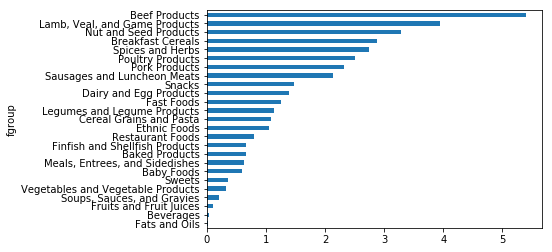

In [174]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [177]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

In [178]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
max_foods.food = max_foods.food.str[:50]

In [181]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 